## Часть 2: Исследовательский анализ данных в Python и проверка гипотез.

- Автор: Чернышова О.В.
- Дата: 15.02.2026г.

## Цели и задачи проекта <font color='#777778'>    
    1. сделать выводы об изменении пользовательских предпочтений и популярности событий осенью 2024 года
    
    2. проверить гипотезу о разнице в поведении пользователей с мобильных и стационарных устройств.

## Описание данных

<font color='#777778'>

 	 
Поля таблиц final_tickets_orders_df 

order_id — уникальный идентификатор заказа.
    
user_id — уникальный идентификатор пользователя.
    
created_dt_msk — дата создания заказа (московское время).
    
created_ts_msk — дата и время создания заказа (московское время).
    
event_id — идентификатор мероприятия из таблицы events.
    
cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
    
age_limit — возрастное ограничение мероприятия.
    
currency_code — валюта оплаты, например rub для российских рублей.
    
device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
    
revenue — выручка от заказа.
    
service_name — название билетного оператора.
    
tickets_count — количество купленных билетов.
    
total — общая сумма заказа;
    
    
Поля таблиц final_tickets_events_df:  
    
event_id — уникальный идентификатор мероприятия.
    
event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
    
event_type_description — описание типа мероприятия.
    
event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
    
organizers — организаторы мероприятия.
    
region_name — название региона.
    
city_name — название города.
    
venue_id — уникальный идентификатор площадки.
    
venue_name — название площадки.
    
venue_address — адрес площадки.
    
     
Поля таблиц final_tickets_tenge_df:
    
nominal — номинал (100 тенге);
    
data — дата;
    
curs — курс тенге к рублю;
    
cdx — обозначение валюты (kzt).
</font>

## Содержимое проекта

<font color='#777778'>
    
    
  
Раздел 1. Загрузка данных и ознакомление.
    
1.1. Загрузка данных и знакомство с ними
    
1.2. Предобработка данных и подготовка их к исследованию
    
1.3. Проверка на явные и неявные дубликаты
    
1.4.  преобразования типов данных
    
 Раздел 2. Предобработка данных и подготовка их к исследованию 
    
 2.1 Проверьте данные на пропуски.
    
 2.2 Изучите значения в ключевых столбцах и при обнаружении ошибок обработайте их:  
 2.3. Создание новых столбцов 'revenue_rub', 'one_ticket_revenue_rub', 'month', 'season'.
    
 Раздел 3. Исследовательский анализ данных
  
 3.1 Анализ распределения заказов по сегментам и их сезонные изменения
    
 3.2. Осенняя активность пользователей 
    
 3.3. Популярные события и партнёры
    
 Промежуточный вывод
    
Раздел 4. Статистический анализ данных
    
Раздел 5. Вывод  
   </font>

---

## 1. Загрузка данных и знакомство с ними



In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

In [6]:
orders_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [7]:
events_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [8]:
tickets_tenge_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [9]:
display(orders_df.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [10]:
pd.to_datetime(orders_df['created_ts_msk'])

0        2024-08-20 16:08:03
1        2024-07-23 18:36:24
2        2024-10-06 13:56:02
3        2024-07-13 19:40:48
4        2024-10-04 22:33:15
                 ...        
290844   2024-10-27 18:00:57
290845   2024-10-27 17:53:53
290846   2024-10-30 13:37:43
290847   2024-09-24 10:07:42
290848   2024-09-25 15:12:40
Name: created_ts_msk, Length: 290849, dtype: datetime64[ns]

In [11]:
display(events_df.head())

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [12]:
display(tickets_tenge_df.head())

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


 <div class="alert alert-info"> <b>Комментарии студентаV1:</b> 
    
Промежуточный вывод:

при загрузке было обнаружено:
    
в таблице orders_df.csv 290849 строк
    
в таблице  events_df 22427 строк
    
в таблице tickets_tenge_df - 357 строк
    
необходимо будет  сделать на стадии предобработки данных: 
    

- преобразования типов данных 
    
- проверить на пропуски
    
- исключить дубликаты
    
- нормализацию данных

   
</div>

## 2. Предобработка данных и подготовка их к исследованию:


In [13]:
# Считаем пропуски в датафрейме df
print(orders_df.isna().sum())

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64


In [14]:
# Считаем пропуски в датафрейме df
print(events_df.isna().sum())


event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64


In [15]:
unique_count = orders_df['event_id'].nunique()
print(f"Количество уникальных значений в столбце 'event_id': {unique_count}")

Количество уникальных значений в столбце 'event_id': 22446


In [16]:
unique_count_2 = events_df['event_id'].nunique()
print(f"Количество уникальных значений в столбце 'event_id': {unique_count_2}")
 

Количество уникальных значений в столбце 'event_id': 22427


In [17]:
# Находим event_id, которые отсутствуют в events_df
missing_events = orders_df[~orders_df['event_id'].isin(events_df['event_id'])]

# Перечисляем уникальные event_id
unique_missing_event_ids = missing_events['event_id'].unique()

print(unique_missing_event_ids)

[533222 530296 532300 477731 536716 246804 536731 555671 548224 538260
 534151 536715 539336 553041 553435 548062 572020 559840 505937]


In [18]:
# Используем unique_missing_event_ids для фильтрации

filtered_df = orders_df[orders_df['event_id'].isin(unique_missing_event_ids)]

print(filtered_df)

        order_id          user_id created_dt_msk       created_ts_msk  \
62       6493246  002ec276eee9b0b     2024-10-14  2024-10-14 16:27:53   
63       6493275  002ec276eee9b0b     2024-10-14  2024-10-14 16:22:38   
64       6493304  002ec276eee9b0b     2024-10-14  2024-10-14 16:29:20   
237      8272280  00da083909dc06b     2024-06-07  2024-06-07 17:50:50   
238      8272512  00da083909dc06b     2024-06-07  2024-06-07 17:49:16   
...          ...              ...            ...                  ...   
276820   2403521  f3aee60b726d6fc     2024-06-09  2024-06-09 12:11:12   
282106   5183577  fa916e688691c4e     2024-06-27  2024-06-27 19:12:03   
282107   5183606  fa916e688691c4e     2024-06-27  2024-06-27 19:15:33   
285576   4818670  fd4d47438ebb946     2024-06-12  2024-06-12 21:38:08   
287281   6019299  fe237d2cfd6e503     2024-06-09  2024-06-09 11:57:01   

        event_id cinema_circuit  age_limit currency_code  \
62        533222            нет          6           rub   
63 

In [19]:
#посмотрим позиции event_id, которые отсутствуют в events_df с нулевой выручкой
orders_df[orders_df['revenue']== 0]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
24,3253250,0018ecd8a38a51b,2024-07-25,2024-07-25 20:38:57,548041,нет,18,rub,mobile,0.0,Билеты без проблем,3,0.0,NaN
68,4130442,0033403583a55ed,2024-06-19,2024-06-19 14:57:25,538926,нет,18,rub,mobile,0.0,Билеты без проблем,1,0.0,NaN
69,4130500,0033403583a55ed,2024-06-19,2024-06-19 11:07:15,538926,нет,18,rub,mobile,0.0,Билеты без проблем,1,0.0,0.0
70,4130471,0033403583a55ed,2024-06-19,2024-06-19 11:06:10,538926,нет,18,rub,mobile,0.0,Билеты без проблем,1,0.0,0.0
71,4130529,0033403583a55ed,2024-06-19,2024-06-19 10:53:29,538926,нет,18,rub,mobile,0.0,Билеты без проблем,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290382,3262124,ff431fb03dba1e6,2024-08-07,2024-08-07 12:46:34,555672,нет,16,rub,mobile,0.0,Билеты без проблем,4,0.0,0.0
290476,5434427,ff684621b134cc4,2024-06-09,2024-06-09 12:35:52,524592,нет,0,rub,desktop,0.0,Лучшие билеты,3,0.0,1.0
290613,388514,ff9310a90294d5c,2024-07-30,2024-07-30 17:16:52,553825,нет,0,rub,mobile,0.0,Лови билет!,3,0.0,6.0
290614,388485,ff9310a90294d5c,2024-07-30,2024-07-30 17:15:36,553825,нет,0,rub,mobile,0.0,Лови билет!,3,0.0,0.0


In [20]:
orders_df[orders_df['user_id']== 'ff9310a90294d5c']

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
290606,7086818,ff9310a90294d5c,2024-06-21,2024-06-21 14:19:59,18452,нет,12,rub,mobile,277.18,Яблоко,4,3464.80,NaN
290607,7086760,ff9310a90294d5c,2024-06-21,2024-06-21 14:16:10,18452,нет,12,rub,mobile,207.89,Яблоко,3,2598.60,0.0
290608,7086789,ff9310a90294d5c,2024-06-21,2024-06-21 14:16:42,18452,нет,12,rub,mobile,277.18,Яблоко,4,3464.80,0.0
290609,6532773,ff9310a90294d5c,2024-07-10,2024-07-10 21:09:12,178000,нет,0,rub,mobile,427.90,Весь в билетах,4,5348.81,19.0
290610,7966939,ff9310a90294d5c,2024-07-18,2024-07-18 20:11:03,546147,нет,16,rub,mobile,127.22,Билеты без проблем,1,3180.58,8.0
290611,954043,ff9310a90294d5c,2024-07-24,2024-07-24 08:57:31,157825,нет,12,rub,mobile,648.73,Лови билет!,2,5897.58,6.0
290612,953956,ff9310a90294d5c,2024-07-24,2024-07-24 08:55:45,157825,нет,12,rub,mobile,324.37,Лови билет!,1,2948.79,0.0
290613,388514,ff9310a90294d5c,2024-07-30,2024-07-30 17:16:52,553825,нет,0,rub,mobile,0.00,Лови билет!,3,0.00,6.0
290614,388485,ff9310a90294d5c,2024-07-30,2024-07-30 17:15:36,553825,нет,0,rub,mobile,0.00,Лови билет!,3,0.00,0.0
290615,1189668,ff9310a90294d5c,2024-08-02,2024-08-02 09:50:08,459673,нет,12,rub,mobile,985.15,Мой билет,2,8955.95,3.0


In [21]:
rows_with_zero_revenue = orders_df[orders_df['revenue'] == 0]

# Вычисляем общее количество строк с revenue = 0
count_zero_revenue = len(rows_with_zero_revenue)

print(f"Строки с revenue = 0 составляют {count_zero_revenue:.2f}")

# Вычисляем общее количество строк в датафрейме
total_rows = len(orders_df)

# Вычисляем долю строк с revenue = 0 от общего количества строк
percentage_zero_revenue = (count_zero_revenue / total_rows) * 100

print(f"Строки с revenue = 0 составляют {percentage_zero_revenue:.2f}% от общего набора данных.")
 

Строки с revenue = 0 составляют 5737.00
Строки с revenue = 0 составляют 1.97% от общего набора данных.


In [22]:
# Сохраняем количество строк до удаления дубликатов
initial_row_count = orders_df.shape[0]

# Удаляем 
orders_df = orders_df[orders_df['revenue'] != 0]

# Сохраняем количество строк после удаления дубликатов
final_row_count = orders_df.shape[0]

# Выводим результаты
print(f"Количество строк до удаления: {initial_row_count}")

print(f"Количество строк после удаления : {final_row_count}")

duplicates_removed = initial_row_count - final_row_count

duplicates_share = duplicates_removed / initial_row_count

print(f"Количество удаленных строк: {duplicates_removed}")

print(f"Доля удаленных строк: {duplicates_share:.2%}")

Количество строк до удаления: 290849
Количество строк после удаления : 285112
Количество удаленных строк: 5737
Доля удаленных строк: 1.97%


In [23]:
# Объединим датафреймы
df = pd.merge(orders_df, events_df, on='event_id', how='left')

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285112 entries, 0 to 285111
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                285112 non-null  int64  
 1   user_id                 285112 non-null  object 
 2   created_dt_msk          285112 non-null  object 
 3   created_ts_msk          285112 non-null  object 
 4   event_id                285112 non-null  int64  
 5   cinema_circuit          285112 non-null  object 
 6   age_limit               285112 non-null  int64  
 7   currency_code           285112 non-null  object 
 8   device_type_canonical   285112 non-null  object 
 9   revenue                 285112 non-null  float64
 10  service_name            285112 non-null  object 
 11  tickets_count           285112 non-null  int64  
 12  total                   285112 non-null  float64
 13  days_since_prev         263500 non-null  float64
 14  event_name          

In [25]:
df['created_dt_msk'] = pd.to_datetime(df['created_dt_msk'])
df['created_ts_msk'] = pd.to_datetime(df['created_ts_msk'])


In [26]:
print(df['created_ts_msk'].unique())

['2024-08-20T16:08:03.000000000' '2024-07-23T18:36:24.000000000'
 '2024-10-06T13:56:02.000000000' ... '2024-10-30T13:37:43.000000000'
 '2024-09-24T10:07:42.000000000' '2024-09-25T15:12:40.000000000']


2\.2 Изучите значения в ключевых столбцах и при обнаружении ошибок обработайте их:

In [27]:
# Список столбцов, для которых нужно определить количество уникальных значений
columns_to_check = ['cinema_circuit','currency_code','device_type_canonical','service_name','event_type_main','region_name','venue_name','venue_address']

# Проходим по каждому столбцу и выводим количество уникальных значений
for column in columns_to_check:
    unique_count = df[column].nunique()
    print(f"Количество уникальных значений в столбце '{column}': {unique_count}")

Количество уникальных значений в столбце 'cinema_circuit': 6
Количество уникальных значений в столбце 'currency_code': 2
Количество уникальных значений в столбце 'device_type_canonical': 2
Количество уникальных значений в столбце 'service_name': 36
Количество уникальных значений в столбце 'event_type_main': 7
Количество уникальных значений в столбце 'region_name': 81
Количество уникальных значений в столбце 'venue_name': 3199
Количество уникальных значений в столбце 'venue_address': 3207


In [28]:
#Изучение неявных дубликатов, делаем осмотр значений, ведь могут быть опечатки или похожего рода ошибки
for column in ['cinema_circuit','currency_code','device_type_canonical','service_name','event_type_main','region_name','venue_name','venue_address']:
        print(f'Уникальные значения в столбце {column}:')
        print(df[column].sort_values().unique())
        print()

Уникальные значения в столбце cinema_circuit:
['Другое' 'КиноСити' 'Киномакс' 'Москино' 'ЦентрФильм' 'нет']

Уникальные значения в столбце currency_code:
['kzt' 'rub']

Уникальные значения в столбце device_type_canonical:
['desktop' 'mobile']

Уникальные значения в столбце service_name:
['Crazy ticket!' 'Show_ticket' 'Билет по телефону' 'Билеты без проблем'
 'Билеты в интернете' 'Билеты в руки' 'Быстробилет' 'Быстрый кассир'
 'Весь в билетах' 'Восьмёрка' 'Вперёд!' 'Выступления.ру'
 'Городской дом культуры' 'Дом культуры' 'Дырокол' 'За билетом!'
 'Зе Бест!' 'КарандашРУ' 'Кино билет' 'Край билетов' 'Лимоны'
 'Лови билет!' 'Лучшие билеты' 'Мир касс' 'Мой билет' 'Облачко'
 'Прачечная' 'Радио ticket' 'Реестр' 'Росбилет' 'Тебе билет!' 'Телебилет'
 'Тех билет' 'Цвет и билет' 'Шоу начинается!' 'Яблоко']

Уникальные значения в столбце event_type_main:
['выставки' 'другое' 'концерты' 'спорт' 'стендап' 'театр' 'ёлки' nan]

Уникальные значения в столбце region_name:
['Белоярская область' 'Берестов

In [29]:
# Анализ категориальных значений
for column in ['age_limit', 'currency_code', 'device_type_canonical', 'service_name']:
    print(f"\nColumn: {column}")
    print("Unique values:", df[column].unique())
    print("Missing values count:", df[column].isna().sum())
    print("Value counts:")
    print(df[column].value_counts(dropna=False), "\n")


Column: age_limit
Unique values: [16  0 18 12  6]
Missing values count: 0
Value counts:
16    77187
12    62227
0     60451
6     51351
18    33896
Name: age_limit, dtype: int64 


Column: currency_code
Unique values: ['rub' 'kzt']
Missing values count: 0
Value counts:
rub    280049
kzt      5063
Name: currency_code, dtype: int64 


Column: device_type_canonical
Unique values: ['mobile' 'desktop']
Missing values count: 0
Value counts:
mobile     228310
desktop     56802
Name: device_type_canonical, dtype: int64 


Column: service_name
Unique values: ['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино б

Проведите нормализацию данных, если это необходимо.



In [30]:
df.columns = df.columns.str.strip()

In [31]:
# Названия привеодим к нижнему регистру 
df['cinema_circuit'] = df['cinema_circuit'].str.lower()
df['currency_code'] = df['currency_code'].str.lower()
df['device_type_canonical'] = df['device_type_canonical'].str.lower()
df['service_name'] = df['service_name'].str.lower()
df['event_type_main'] = df['event_type_main'].str.lower()
df['region_name'] = df['region_name'].str.lower()
df['venue_name'] = df['venue_name'].str.lower()
df['venue_address'] = df['venue_address'].str.lower()


In [32]:
#Необходимо также избавиться от лишних пробелов в начале и в конце строки, которые могут создавать дубликаты
columns_to_strip = ['cinema_circuit','currency_code','device_type_canonical','service_name','event_type_main','region_name','venue_name','venue_address']  # Укажите здесь имена нужных вам столбцов
df[columns_to_strip] = df[columns_to_strip].apply(lambda x: x.str.strip())

In [33]:
# Получение списка всех количественных столбцов
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Вычисление основных статистических показателей для каждого количественного столбца
for column in numerical_columns:
    stats = df[column].describe()
    print(f"Статистика для столбца {column}:\n{stats}\n")

Статистика для столбца order_id:
count    2.851120e+05
mean     4.325892e+06
std      2.495716e+06
min      1.000000e+00
25%      2.167309e+06
50%      4.326728e+06
75%      6.487076e+06
max      8.653108e+06
Name: order_id, dtype: float64

Статистика для столбца event_id:
count    285112.000000
mean     435999.892712
std      147982.502840
min        4436.000000
25%      355298.000000
50%      494565.000000
75%      544963.000000
max      592325.000000
Name: event_id, dtype: float64

Статистика для столбца age_limit:
count    285112.000000
mean         10.171266
std           6.502535
min           0.000000
25%           6.000000
50%          12.000000
75%          16.000000
max          18.000000
Name: age_limit, dtype: float64

Статистика для столбца revenue:
count    285112.000000
mean        637.660924
std        1236.363416
min         -90.760000
25%         126.800000
50%         368.340000
75%         822.980000
max       81174.540000
Name: revenue, dtype: float64

Статистика д

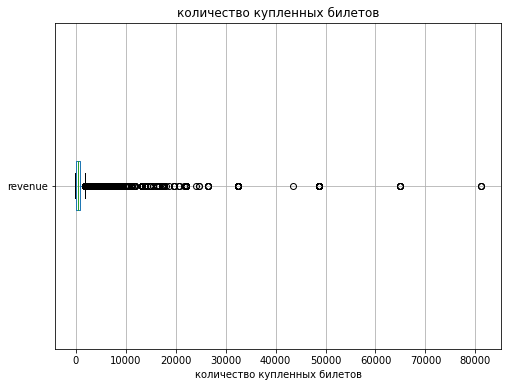

In [34]:
#Строим диаграмму размаха методом boxplot()
boxplot = df.boxplot(column='revenue',
    vert=False, 
    showfliers=True,  # Чтобы видеть выбросы                             
    figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('количество купленных билетов')

boxplot.set_xlabel('количество купленных билетов')

plt.show()

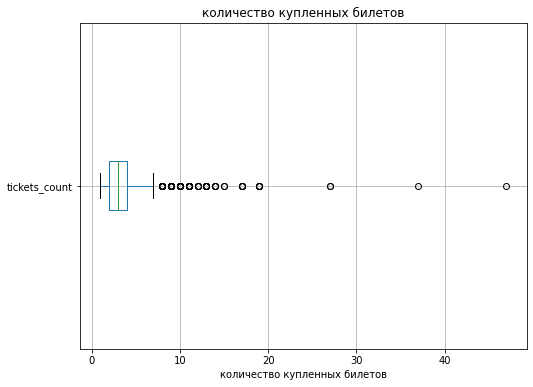

In [35]:
#Строим диаграмму размаха методом boxplot()
boxplot = df.boxplot(column='tickets_count',
    vert=False, 
    showfliers=True,  # Чтобы видеть выбросы                             
    figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('количество купленных билетов')

boxplot.set_xlabel('количество купленных билетов')

plt.show()

In [36]:
# разделяем на два датафрейма
ruble_df = df[df['currency_code'] == 'rub'].copy()
tenge_df = df[df['currency_code'] == 'kzt'].copy()

# Вычисление 99-го процентиля для каждой группы
revenue_99th_percentile_ruble = ruble_df['revenue'].quantile(0.99)
revenue_99th_percentile_tenge = tenge_df['revenue'].quantile(0.99)

# Фильтрация значений, не превышающих 99-й процентиль для каждой группы
filtered_ruble_df = ruble_df[ruble_df['revenue'] < revenue_99th_percentile_ruble]
filtered_tenge_df = tenge_df[tenge_df['revenue'] < revenue_99th_percentile_tenge]
print(filtered_ruble_df['revenue'].describe())
print(filtered_tenge_df['revenue'].describe())

count    277192.000000
mean        520.518410
std         499.809905
min         -90.760000
25%         122.440000
50%         354.350000
75%         788.900000
max        2569.610000
Name: revenue, dtype: float64
count     4838.000000
mean      4384.273055
std       4072.247486
min          8.670000
25%        486.030000
50%       3698.830000
75%       7088.270000
max      17230.320000
Name: revenue, dtype: float64


In [37]:
# Объединение filtered_ruble_df и filtered_tenge_df в один датафрейм
final_df = pd.concat([filtered_ruble_df, filtered_tenge_df])


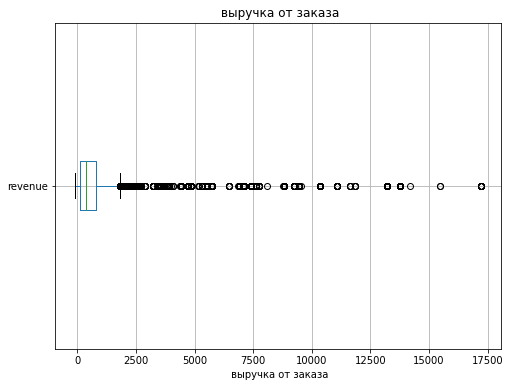

In [38]:
# Строим диаграмму размаха методом boxplot()
boxplot = final_df.boxplot(column='revenue',
    vert=False, 
    showfliers=True,  # Чтобы видеть выбросы                             
    figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title(' выручка от заказа')

boxplot.set_xlabel(' выручка от заказа')

plt.show()

In [39]:
# Просмотр основных статистических показателей для столбцов revenue и tickets_count
stats_revenue = final_df['revenue'].describe()
stats_tickets_count = final_df['tickets_count'].describe()
print("Статистика для столбца revenue:\n", stats_revenue, "\n")
print("Статистика для столбца tickets_count:\n", stats_tickets_count, "\n")

# Проверка на наличие пропусков в этих столбцах
missing_revenue = final_df['revenue'].isna().sum()
missing_tickets_count = final_df['tickets_count'].isna().sum()
print(f"Пропусков в столбце revenue: {missing_revenue}")
print(f"Пропусков в столбце tickets_count: {missing_tickets_count}")

Статистика для столбца revenue:
 count    282030.000000
mean        586.798043
std         884.100994
min         -90.760000
25%         125.482500
50%         361.080000
75%         802.620000
max       17230.320000
Name: revenue, dtype: float64 

Статистика для столбца tickets_count:
 count    282030.000000
mean          2.741861
std           1.156491
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          47.000000
Name: tickets_count, dtype: float64 

Пропусков в столбце revenue: 0
Пропусков в столбце tickets_count: 0


In [40]:
#Изучение неявных дубликатов, делаем осмотр значений, ведь могут быть опечатки или похожего рода ошибки
for column in ['cinema_circuit','currency_code','device_type_canonical','service_name','event_type_main','region_name','venue_name','venue_address']:
        print(f'Уникальные значения в столбце {column}:')
        print(final_df[column].sort_values().unique())
        print()

Уникальные значения в столбце cinema_circuit:
['другое' 'киномакс' 'киносити' 'москино' 'нет' 'центрфильм']

Уникальные значения в столбце currency_code:
['kzt' 'rub']

Уникальные значения в столбце device_type_canonical:
['desktop' 'mobile']

Уникальные значения в столбце service_name:
['crazy ticket!' 'show_ticket' 'билет по телефону' 'билеты без проблем'
 'билеты в интернете' 'билеты в руки' 'быстробилет' 'быстрый кассир'
 'весь в билетах' 'восьмёрка' 'вперёд!' 'выступления.ру'
 'городской дом культуры' 'дом культуры' 'дырокол' 'за билетом!'
 'зе бест!' 'карандашру' 'кино билет' 'край билетов' 'лимоны'
 'лови билет!' 'лучшие билеты' 'мир касс' 'мой билет' 'облачко'
 'прачечная' 'радио ticket' 'реестр' 'росбилет' 'тебе билет!' 'телебилет'
 'тех билет' 'цвет и билет' 'шоу начинается!' 'яблоко']

Уникальные значения в столбце event_type_main:
['выставки' 'другое' 'концерты' 'спорт' 'стендап' 'театр' 'ёлки' nan]

Уникальные значения в столбце region_name:
['белоярская область' 'берестов

In [41]:
# Сохраняем количество строк до удаления дубликатов
initial_row_count = final_df.shape[0]
# Сортируем датафрейм по всем столбцам
df_sorted = final_df.sort_values(by=list(df.columns))
# Удаляем дубликаты
#df_no_duplicates = df_sorted.drop_duplicates()
df_no_duplicates = df_sorted.drop_duplicates(subset=['user_id', 'created_ts_msk', 'event_id'])
 

# Сохраняем количество строк после удаления дубликатов
final_row_count = df_no_duplicates.shape[0]
# Выводим результаты
print(f"Количество строк до удаления дубликатов: {initial_row_count}")
print(f"Количество строк после удаления дубликатов: {final_row_count}")
duplicates_removed = initial_row_count - final_row_count
duplicates_share = duplicates_removed / initial_row_count
print(f"Количество удаленных дубликатов: {duplicates_removed}")
print(f"Доля удаленных дубликатов: {duplicates_share:.2%}")

Количество строк до удаления дубликатов: 282030
Количество строк после удаления дубликатов: 281918
Количество удаленных дубликатов: 112
Доля удаленных дубликатов: 0.04%


2\.4  преобразования типов данных.

In [42]:
df_no_duplicates.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281918 entries, 81855 to 156424
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                281918 non-null  int64         
 1   user_id                 281918 non-null  object        
 2   created_dt_msk          281918 non-null  datetime64[ns]
 3   created_ts_msk          281918 non-null  datetime64[ns]
 4   event_id                281918 non-null  int64         
 5   cinema_circuit          281918 non-null  object        
 6   age_limit               281918 non-null  int64         
 7   currency_code           281918 non-null  object        
 8   device_type_canonical   281918 non-null  object        
 9   revenue                 281918 non-null  float64       
 10  service_name            281918 non-null  object        
 11  tickets_count           281918 non-null  int64         
 12  total                   28

2\.5  Создайте несколько новых столбцов:

In [43]:
print(df_no_duplicates.columns)
print(tickets_tenge_df.columns)

Index(['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address'],
      dtype='object')
Index(['data', 'nominal', 'curs', 'cdx'], dtype='object')


In [44]:
# Преобразуем столбец 'data' в формат datetime, если он ещё не преобразован
tickets_tenge_df['data'] = pd.to_datetime(tickets_tenge_df['data'])

# Теперь выполняем слияние
merged_df = pd.merge(df_no_duplicates, tickets_tenge_df, left_on='created_dt_msk', right_on='data', how='left')

# Расчет выручки в рублях
merged_df['revenue_rub'] = merged_df.apply(lambda row: row['revenue'] * row['curs'] / 100 if row['currency_code'] == 'kzt' else row['revenue'], axis=1)

# Удаление вспомогательного столбца с курсом, если он больше не нужен
merged_df.drop(columns=['curs'], inplace=True)

print(merged_df)

        order_id          user_id created_dt_msk      created_ts_msk  \
0              1  3ebd0c4b59f6bdd     2024-08-08 2024-08-08 15:01:11   
1             30  1a66f181a803c75     2024-09-05 2024-09-05 19:44:21   
2             59  1a66f181a803c75     2024-07-25 2024-07-25 10:09:41   
3             88  7997823870f2b1b     2024-09-26 2024-09-26 16:03:44   
4            117  1c5bac640c12e86     2024-09-15 2024-09-15 14:18:07   
...          ...              ...            ...                 ...   
281913   8652992  e226cc9d03c48ad     2024-07-09 2024-07-09 17:14:32   
281914   8653021  e226cc9d03c48ad     2024-06-14 2024-06-14 11:47:00   
281915   8653050  ba69e4fd37e7378     2024-09-14 2024-09-14 15:13:48   
281916   8653079  8187dac4be757a0     2024-08-31 2024-08-31 20:33:42   
281917   8653108  8187dac4be757a0     2024-08-31 2024-08-31 19:59:19   

        event_id cinema_circuit  age_limit currency_code  \
0         555432            нет         16           rub   
1         14933

In [45]:
merged_df['one_ticket_revenue_rub'] = merged_df['revenue_rub'] / merged_df['tickets_count']

print(merged_df)
 

        order_id          user_id created_dt_msk      created_ts_msk  \
0              1  3ebd0c4b59f6bdd     2024-08-08 2024-08-08 15:01:11   
1             30  1a66f181a803c75     2024-09-05 2024-09-05 19:44:21   
2             59  1a66f181a803c75     2024-07-25 2024-07-25 10:09:41   
3             88  7997823870f2b1b     2024-09-26 2024-09-26 16:03:44   
4            117  1c5bac640c12e86     2024-09-15 2024-09-15 14:18:07   
...          ...              ...            ...                 ...   
281913   8652992  e226cc9d03c48ad     2024-07-09 2024-07-09 17:14:32   
281914   8653021  e226cc9d03c48ad     2024-06-14 2024-06-14 11:47:00   
281915   8653050  ba69e4fd37e7378     2024-09-14 2024-09-14 15:13:48   
281916   8653079  8187dac4be757a0     2024-08-31 2024-08-31 20:33:42   
281917   8653108  8187dac4be757a0     2024-08-31 2024-08-31 19:59:19   

        event_id cinema_circuit  age_limit currency_code  \
0         555432            нет         16           rub   
1         14933

In [46]:
merged_df['month'] = merged_df['created_dt_msk'].dt.month  # выделение месяца

print(merged_df) 

        order_id          user_id created_dt_msk      created_ts_msk  \
0              1  3ebd0c4b59f6bdd     2024-08-08 2024-08-08 15:01:11   
1             30  1a66f181a803c75     2024-09-05 2024-09-05 19:44:21   
2             59  1a66f181a803c75     2024-07-25 2024-07-25 10:09:41   
3             88  7997823870f2b1b     2024-09-26 2024-09-26 16:03:44   
4            117  1c5bac640c12e86     2024-09-15 2024-09-15 14:18:07   
...          ...              ...            ...                 ...   
281913   8652992  e226cc9d03c48ad     2024-07-09 2024-07-09 17:14:32   
281914   8653021  e226cc9d03c48ad     2024-06-14 2024-06-14 11:47:00   
281915   8653050  ba69e4fd37e7378     2024-09-14 2024-09-14 15:13:48   
281916   8653079  8187dac4be757a0     2024-08-31 2024-08-31 20:33:42   
281917   8653108  8187dac4be757a0     2024-08-31 2024-08-31 19:59:19   

        event_id cinema_circuit  age_limit currency_code  \
0         555432            нет         16           rub   
1         14933

In [47]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

merged_df['season'] = merged_df['month'].apply(get_season)

print(merged_df)

        order_id          user_id created_dt_msk      created_ts_msk  \
0              1  3ebd0c4b59f6bdd     2024-08-08 2024-08-08 15:01:11   
1             30  1a66f181a803c75     2024-09-05 2024-09-05 19:44:21   
2             59  1a66f181a803c75     2024-07-25 2024-07-25 10:09:41   
3             88  7997823870f2b1b     2024-09-26 2024-09-26 16:03:44   
4            117  1c5bac640c12e86     2024-09-15 2024-09-15 14:18:07   
...          ...              ...            ...                 ...   
281913   8652992  e226cc9d03c48ad     2024-07-09 2024-07-09 17:14:32   
281914   8653021  e226cc9d03c48ad     2024-06-14 2024-06-14 11:47:00   
281915   8653050  ba69e4fd37e7378     2024-09-14 2024-09-14 15:13:48   
281916   8653079  8187dac4be757a0     2024-08-31 2024-08-31 20:33:42   
281917   8653108  8187dac4be757a0     2024-08-31 2024-08-31 19:59:19   

        event_id cinema_circuit  age_limit currency_code  \
0         555432            нет         16           rub   
1         14933

<div class="alert alert-info"> <b>Комментарии студента:</b> 
    
Предобработке данных:
    
в таблице orders_df 290 849 строк  

удалили строки с revenue = 0 : 5737 
        
дальше исключили строки без учёта идентификаторов заказа - 27 строк.


объединили  orders_df с таблицей  events_df .
    
исключили 112 дубликатов по столбцам ['user_id', 'created_ts_msk', 'event_id']


исключили выбросы в выручке с заказа revenue, отобрали значения по 99-му процентилю.
    
Осталось 281 981 строки.

разделили таблицу на рубли и тенге.
Создали несколько новых столбцов:
    
revenue_rub — приведите выручку с заказа к единой валюте — российскому рублю. 
Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю 
final_tickets_tenge_df.csv за 2024 год. 

one_ticket_revenue_rub — рассчитайте выручку с продажи одного билета на мероприятие.

month — выделили месяц оформления заказа в отдельный столбец.

season — создали столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

   
</div>

## Часть 3. Исследовательский анализ данных:

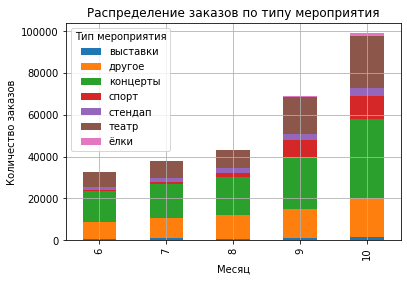

In [48]:
# Анализ по типу мероприятия
event_type_analysis = merged_df.groupby(['month', 'event_type_main']).size().unstack().fillna(0)
event_type_analysis.plot(kind='bar', stacked=True)
plt.title('Распределение заказов по типу мероприятия')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.legend(title='Тип мероприятия')
plt.grid(True)
plt.show()

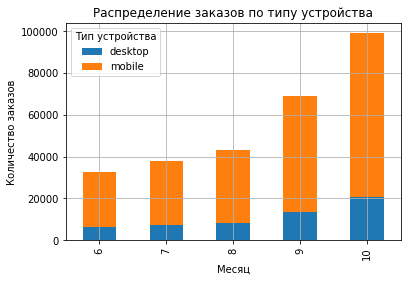

In [49]:
# Анализ по типу устройства
device_type_analysis = merged_df.groupby(['month', 'device_type_canonical']).size().unstack().fillna(0)
device_type_analysis.plot(kind='bar', stacked=True)
plt.title('Распределение заказов по типу устройства')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.legend(title='Тип устройства')
plt.grid(True)
plt.show()

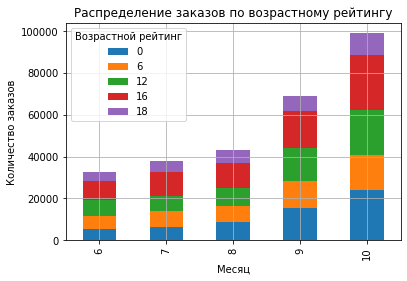

In [50]:
# Анализ по возрастному рейтингу
age_limit_analysis = merged_df.groupby(['month', 'age_limit']).size().unstack().fillna(0)
age_limit_analysis.plot(kind='bar', stacked=True)
plt.title('Распределение заказов по возрастному рейтингу')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.legend(title='Возрастной рейтинг')
plt.grid(True)
plt.show()


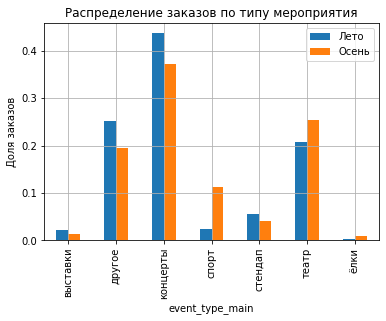

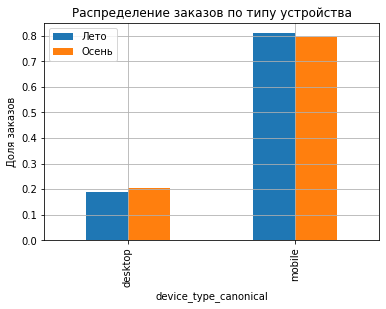

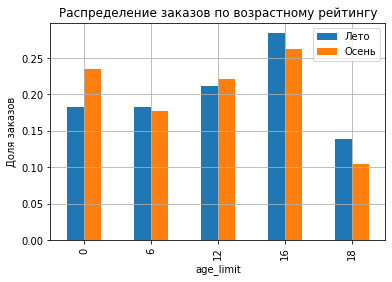

In [51]:
# Фильтруем данные по сезонам
df_summer = merged_df[merged_df['season'] == 'лето']
df_autumn = merged_df[merged_df['season'] == 'осень']

# Функция для расчёта долей и визуализации
def plot_shares(df_summer, df_autumn, category_column, title):
    shares_summer = df_summer.groupby(category_column)['created_dt_msk'].count() / len(df_summer)
    shares_autumn = df_autumn.groupby(category_column)['created_dt_msk'].count() / len(df_autumn)

    # Объединяем данные для визуализации на одном графике
    combined_shares = pd.concat([shares_summer, shares_autumn], axis=1, keys=['Лето', 'Осень'])
    combined_shares.plot(kind='bar', title=title)
    plt.xlabel(category_column)
    plt.ylabel('Доля заказов')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

# Визуализация для разных категорий
plot_shares(df_summer, df_autumn, 'event_type_main', 'Распределение заказов по типу мероприятия')
plot_shares(df_summer, df_autumn, 'device_type_canonical', 'Распределение заказов по типу устройства')
plot_shares(df_summer, df_autumn, 'age_limit', 'Распределение заказов по возрастному рейтингу')
 

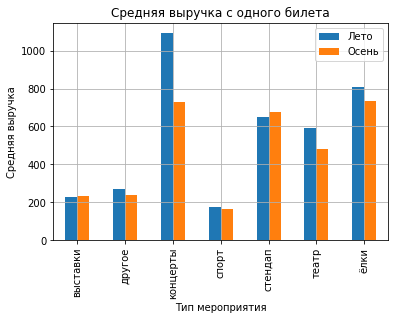

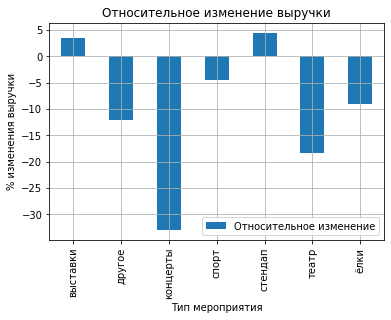

In [52]:
# Фильтруем данные по сезонам
df_summer = merged_df[merged_df['season'] == 'лето']
df_autumn = merged_df[merged_df['season'] == 'осень']

# Функция для расчёта средней выручки с одного билета по типам мероприятий
def calculate_average_revenue(df, category_column):
    return df.groupby(category_column)['revenue'].mean()

# Рассчитываем средние значения выручки для летнего и осеннего периодов
avg_revenue_summer = calculate_average_revenue(df_summer, 'event_type_main')
avg_revenue_autumn = calculate_average_revenue(df_autumn, 'event_type_main')

# Объединяем данные для визуализации на одном графике
combined_revenue = pd.concat([avg_revenue_summer, avg_revenue_autumn], axis=1, keys=['Лето', 'Осень'])
combined_revenue.plot(kind='bar', title='Средняя выручка с одного билета')
plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя выручка')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Находим относительное изменение осенних значений по сравнению с летними
relative_change = (avg_revenue_autumn - avg_revenue_summer) / avg_revenue_summer * 100
relative_change.plot(kind='bar', title='Относительное изменение выручки')
plt.xlabel('Тип мероприятия')
plt.ylabel('% изменения выручки')
plt.grid(True)
plt.legend(['Относительное изменение'])
plt.show()

Отрицательные значения относительного изменения означают, что выручка осенью была ниже, чем летом. можно также заметить, что с июня по октябрь отмечается устойчивый рост количества заказов по различным сегментам. 

 3\.2. Осенняя активность пользователей


                total_orders  tickets_count        total   DAU  \
created_dt_msk                                                   
2024-09-01              1314           3683   8515270.93   555   
2024-09-02              1373           3694   9345651.72   572   
2024-09-03              5107          15281  20557059.43   777   
2024-09-04              1768           4789  11922736.08   685   
2024-09-05              1943           5212  13584017.59   739   
...                      ...            ...          ...   ...   
2024-10-27              2846           7860  17522915.11  1033   
2024-10-28              2837           7924  16057848.65   985   
2024-10-29              2834           7959  16287525.54   998   
2024-10-30              2926           8060  18148303.35  1039   
2024-10-31              5948          15093  31706423.42  1271   

                avg_orders_per_user  avg_tickets_price  
created_dt_msk                                          
2024-09-01                 

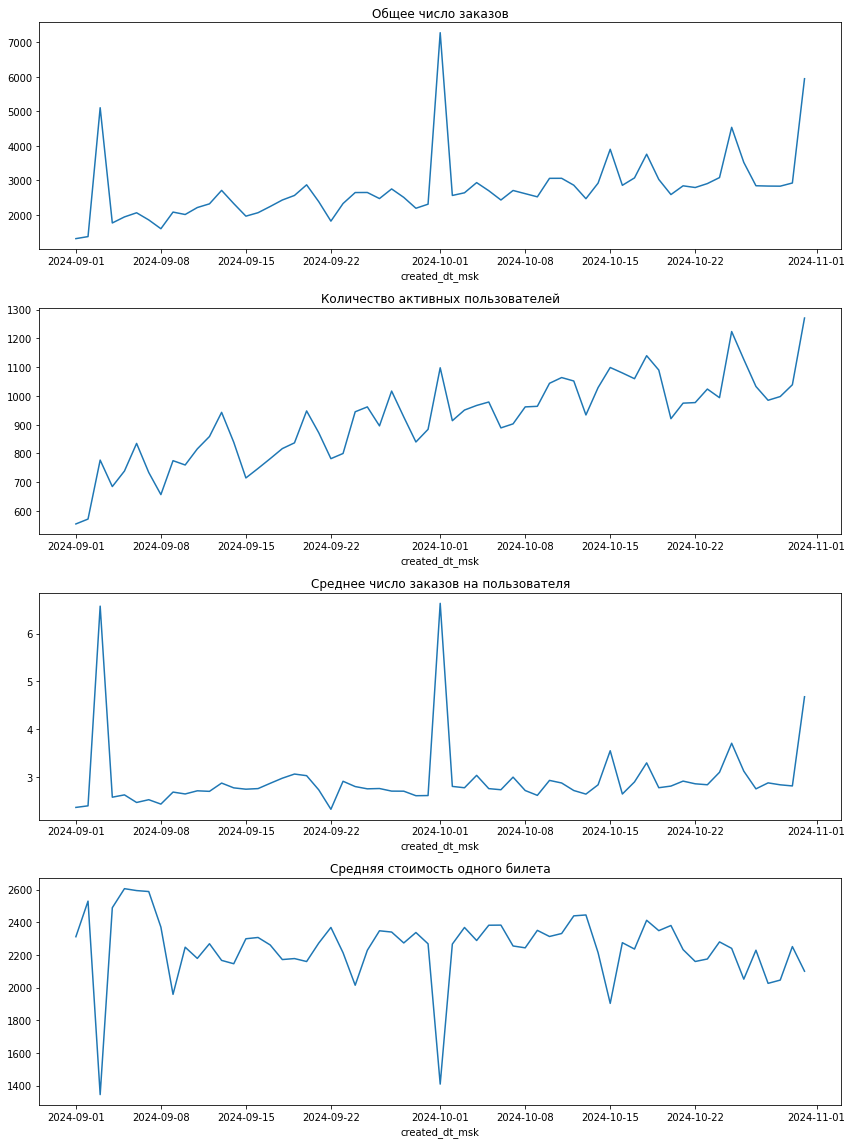

In [53]:
# Фильтруем данные за осенние месяцы 2024 года
fall_data = merged_df[(merged_df['created_dt_msk'].dt.year == 2024) & 
                      (merged_df['created_dt_msk'].dt.month.isin([9, 10]))].copy()

# Создаём сводную таблицу для анализа активности
pivot_table = pd.pivot_table(fall_data, 
                             index=fall_data['created_dt_msk'].dt.date, 
                             values=['order_id', 'user_id', 'tickets_count', 'total'], 
                             aggfunc={'order_id': 'count', 
                                      'user_id': lambda x: len(x.unique()), 
                                      'tickets_count': 'sum', 
                                      'total': 'sum'})

# Рассчитываем среднее число заказов на одного пользователя
pivot_table['avg_orders_per_user'] = pivot_table['order_id'] / pivot_table['user_id']

#средней стоимости одного билета
pivot_table['avg_tickets_price'] = pivot_table['total'] / pivot_table['tickets_count']

# Переименовываем столбцы для удобства
pivot_table.columns = [ 'total_orders','tickets_count', 'total', 'DAU', 'avg_orders_per_user', 'avg_tickets_price' ]

print(pivot_table)

# Визуализация результатов
fig, axs = plt.subplots(4, 1, figsize=(12, 16))

pivot_table['total_orders'].plot(ax=axs[0], title='Общее число заказов')
pivot_table['DAU'].plot(ax=axs[1], title='Количество активных пользователей')
pivot_table['avg_orders_per_user'].plot(ax=axs[2], title='Среднее число заказов на пользователя')
pivot_table['avg_tickets_price'].plot(ax=axs[3], title='Средняя стоимость одного билета')

plt.tight_layout()
plt.show()

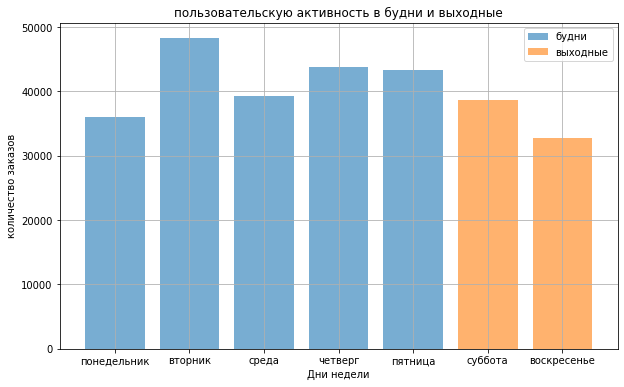

In [54]:
# Выделяем день недели
merged_df['day_of_week'] = merged_df['created_dt_msk'].dt.dayofweek

# Разделяем дни на будни и выходные
merged_df['is_weekend'] = merged_df['day_of_week'].apply(lambda x: 'выходные' if x >= 5 else 'будни')

# Группируем данные по дням недели и будням/выходным
grouped_data = merged_df.groupby(['day_of_week', 'is_weekend'])['order_id'].count().reset_index()

# Визуализация результатов
plt.figure(figsize=(10, 6))
weekday_data = grouped_data[grouped_data['is_weekend'] == 'будни']
weekend_data = grouped_data[grouped_data['is_weekend'] == 'выходные']

plt.bar(weekday_data['day_of_week'], weekday_data['order_id'], label='будни', alpha=0.6)
plt.bar(weekend_data['day_of_week'], weekend_data['order_id'], label='выходные', alpha=0.6)

plt.xticks(range(7), ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье'])
plt.xlabel('Дни недели')
plt.ylabel('количество заказов')
plt.title('пользовательскую активность в будни и выходные')
plt.legend()
plt.grid(True)
plt.show()

На основе анализа недельной цикличности можно сделать промежуточный вывод о том, что пользовательская активность может значительно различаться в зависимости от дня недели. Можно выделить явный рабочий ритм, где понедельник–пятница — это дни наибольшей активности, а выходные (суббота и особенно воскресенье) характеризуются спадом активности. А повышенная активность во вторник может быть связана с отложенными заказами после выходных или с внутренними привычками пользователей (например, планирование недели или закупки).

 3.3. Популярные события и партнёры



In [55]:
region_analysis = merged_df.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),  # Уникальное количество мероприятий
    total_orders=('order_id', 'count')  # Общее число заказов
).reset_index()
# Доли мероприятий и заказов в каждом регионе
region_analysis['events_share'] = region_analysis['unique_events'] / region_analysis['unique_events'].sum()
region_analysis['orders_share'] = region_analysis['total_orders'] / region_analysis['total_orders'].sum()

# Сортируем по уникальному количеству мероприятий для выявления регионов с наибольшим разнообразием
region_analysis_sorted = region_analysis.sort_values(by='unique_events', ascending=False)
# Анализ по билетным партнёрам
partner_analysis = df.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),  # Общее число уникальных мероприятий
    total_orders=('order_id', 'count'),  # Обработанные заказы
    total_revenue=('revenue', 'sum')  # Суммарная выручка с заказов билетов
).reset_index()

# Доли обработанных заказов и выручки для каждого партнёра
partner_analysis['orders_share'] = partner_analysis['total_orders'] / partner_analysis['total_orders'].sum()
partner_analysis['revenue_share'] = partner_analysis['total_revenue'] / partner_analysis['total_revenue'].sum()

# Сортируем по общему числу заказов для выявления наиболее активных партнёров
partner_analysis_sorted = partner_analysis.sort_values(by='total_orders', ascending=False)

 

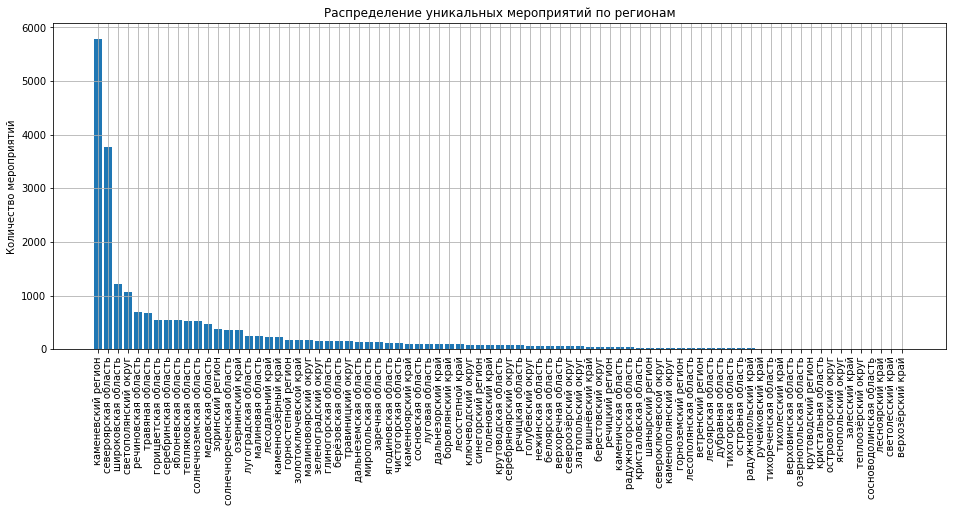

In [56]:
# График для регионов
plt.figure(figsize=(16, 6))
plt.bar(region_analysis_sorted['region_name'], region_analysis_sorted['unique_events'], label='Уникальное количество мероприятий')
plt.ylabel('Количество мероприятий')
plt.title('Распределение уникальных мероприятий по регионам')
plt.grid(True)
plt.xticks(range(len(region_analysis_sorted['region_name'])), region_analysis_sorted['region_name'], rotation=90)
plt.show()

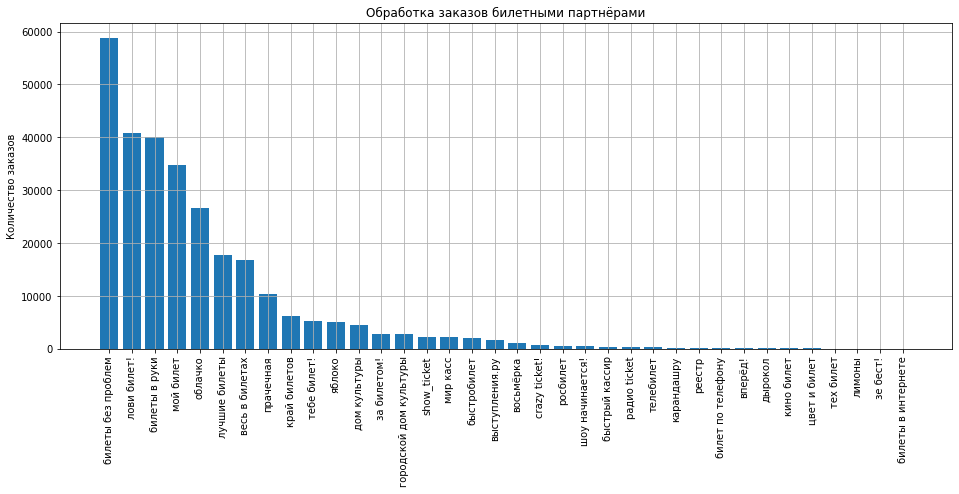

In [57]:
# График для партнёров
plt.figure(figsize=(16, 6))
plt.bar(partner_analysis_sorted['service_name'], partner_analysis_sorted['total_orders'], label='Общее число заказов')
plt.ylabel('Количество заказов')
plt.title('Обработка заказов билетными партнёрами')
plt.grid(True)
plt.xticks(range(len(partner_analysis_sorted['service_name'])), partner_analysis_sorted['service_name'], rotation=90)
plt.show()
 

Промежуточный вывод
После предобработки проверьте для анализа осталось для анализа 281 891 строки, 
а также дайте промежуточный вывод с основными действиями и описанием новых столбцов:

revenue_rub — приведите выручку с заказа к единой валюте — российскому рублю. 

one_ticket_revenue_rub — рассчитали выручку с продажи одного билета на мероприятие.

month — выделиили месяц оформления заказа в отдельный столбец.

season — создали столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'. 

После проведения визуализаии по данным столбцам можно сделать вывлод, что осенняя активность по сравнению с летом у пользователей в разрезе мероприятий снижается (кроме стендап и выставки).

Ключевые регионы - 'Каменевский регион' и партнёров - 'билеты без проблем', которые вносят наибольший вклад в выручку.

## Часть 4. Статистический анализ данных

4\.1 


-Для оценки эффективности нового алгоритма рекомендаций определяем целевую метрику - 

Среднее количество заказов на одного пользователя мобильного устройств выше по сравнению с пользователями стационарных устройств.

Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
.

1.Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза (H0): Среднее количество заказов  пользователей мобильных и стационарных устройств не различается.

Альтернативная гипотеза (H1): среднее количество заказов пользователей мобильных устройств  выше чем у пользователей стационарных устройств.

In [58]:
df_autumn['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

In [59]:
# Подсчёт уникальных пользователей для мобильных и стационарных устройств
mobile_users = df_autumn[df_autumn['device_type_canonical'] == 'mobile']['user_id'].nunique()
desktop_users = df_autumn[df_autumn['device_type_canonical'] == 'desktop']['user_id'].nunique()

print("Уникальные пользователи мобильных устройств:", mobile_users)
print("Уникальные пользователи стационарных устройств:", desktop_users)

Уникальные пользователи мобильных устройств: 14114
Уникальные пользователи стационарных устройств: 4863


In [60]:
# Кажется, между группами существует ощутимая разница. Посмотрим, в каком процентном соотношении они находятся:
100 * df_autumn[df_autumn['device_type_canonical'] == 'mobile']['user_id'].nunique() / df_autumn['user_id'].nunique(), 100 * df_autumn[df_autumn['device_type_canonical'] == 'desktop']['user_id'].nunique() / df_autumn['user_id'].nunique() 

(89.65823910557744, 30.89188159064922)

In [61]:
# Подсчёт количества строк с помощью .shape
number_of_rows = df_autumn.shape[0]
print("Количество строк:", number_of_rows)

Количество строк: 168013


In [62]:
# стоит проверить, возможно, дело в пользователях, которые могли попасть в обе группы
mobile = df_autumn[df_autumn['device_type_canonical'] == 'mobile']['user_id']
desktop = df_autumn[df_autumn['device_type_canonical'] == 'desktop']['user_id']

intersection = list(set(mobile) & set(desktop))
print(intersection) 


['1b2d360745a2152', '78de607f78bb860', 'c9b8c86a0f6dc8d', '028daec3ff80e05', '8e12c944b783937', '94972f4324ab83f', '5e66a197627e3ba', '62eac70febd8d91', '931e8300bee31e1', 'f087ba41a3f9b31', 'de70e44785b1efd', 'e8fd69254e19dd2', '87ab8a3aacef43f', 'a9372dc667f16c3', '14a81c560d778c4', '6f7392dffadaa7f', 'bfc5d3328be5b2e', 'a01d369c103c725', 'f4b0fb36b36aadd', '964735686800b20', '2d2b8195ec8fb66', '360946a8aa9c45e', 'b24f421dd375ab6', '5945a7c3ede04ae', '8b26b596b2299da', '32b897d499ffb66', 'f2b61b6f10bbda0', '9b83e3af86b811d', '2fff690c8383fd9', 'b64bf31c0b1d27b', 'c2db863a19575d4', '7294e7534a975df', '7d73b8da46f3f04', '353a4aec98d9ace', '43c1b935efb8598', 'beec6846c97636f', '1c0e6f4decedd8d', '6d6fcdde1597700', '757f30f72b23d5b', 'c0f8ec8db34e344', '34698b01f6db5f2', '235f892b086bfa6', 'aeb96a7dba6f977', '315cac09f7bb0e6', '341efff8a1ecf26', '0beb8fc0c0a9ce1', '1b7ca4c1e4372b0', '9ea9c48b5d950cd', '5072710c581eaae', 'c13fa0de43e7085', '671bbf99965cfd1', 'b1d1cba963a4038', 'b78479a12a

In [63]:
# Исключим из датафрейма этих пользователей
df_autumn_1 = df_autumn[~df_autumn['user_id'].isin(intersection)] 

In [64]:
# Подсчёт количества строк с помощью .shape
number_of_rows = df_autumn_1.shape[0]
print("Количество строк:", number_of_rows)

Количество строк: 34414


In [65]:
# Подсчёт уникальных пользователей для мобильных и стационарных устройств
mobile_users_1 = df_autumn_1[df_autumn_1['device_type_canonical'] == 'mobile']['user_id'].nunique()
desktop_users_1 = df_autumn_1[df_autumn_1['device_type_canonical'] == 'desktop']['user_id'].nunique()

print("Количество уникальных пользователей мобильных устройств:", mobile_users_1)
print("Количество уникальных пользователей стационраных устройств:", desktop_users_1)

Количество уникальных пользователей мобильных устройств: 10879
Количество уникальных пользователей стационраных устройств: 1628


вспомогательная функция print_stattest_results(p_value, alpha), которая будет интерпретировать результаты статистического теста на основе p-value и заданного уровня значимости (α-уровня). Функция должна решать, следует ли принять альтернативную гипотезу или сохранить нулевую гипотезу.

У функции два параметра:

    p_value (тип float) — значение p-value, полученное в результате выполнения статистического теста.
    alpha (тип float, необязательный, по умолчанию alpha = 0.05) — уровень значимости статистического теста, который используется как порог для принятия решения об отклонении нулевой гипотезы.



In [66]:
def print_stattest_results(p_value:float, alpha:float = 0.05):
    if p_value < alpha:
        print(f"Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.")
    else:
        print(f"Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.")
# Напишите код для функции здесь

print_stattest_results(p_value=0.0001)
print_stattest_results(p_value=0.1)

Полученное значение p_value=0.0001 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Полученное значение p_value=0.1 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


In [67]:
# Разделяем данные по типу устройства
df_mobile = df_autumn_1[df_autumn_1['device_type_canonical'] == 'mobile']
df_desktop = df_autumn_1[df_autumn_1['device_type_canonical'] == 'desktop']

# Рассчитываем p_value для одностороннего t-теста
results = ttest_ind(df_mobile['order_id'], df_desktop['order_id'], alternative='greater')
p_value = results.pvalue

print("p-value:", p_value)


# Расчёт среднего количества заказов на одного пользователя
avg_orders_per_user_mobile = df_mobile.groupby('user_id')['order_id'].nunique().mean()
avg_orders_per_user_desktop = df_desktop.groupby('user_id')['order_id'].nunique().mean()

print(f'Среднее количество заказов на одного пользователя моб. устройств {avg_orders_per_user_mobile}')
print(f'Среднее количество заказов на одного пользователя стац.устройств {avg_orders_per_user_desktop}')

# Интерпретация результата
if p_value < 0.05:
    print("Различия среднего количества между группами являются статистически значимыми.")
else:
    print("Различия среднего количества между группами не являются статистически значимыми.")
 

p-value: 0.6052094275442153
Среднее количество заказов на одного пользователя моб. устройств 2.867910653552716
Среднее количество заказов на одного пользователя стац.устройств 1.9742014742014742
Различия среднего количества между группами не являются статистически значимыми.


Проанализируем еще одну метрику среднее время между заказами пользователей мобильных и стационарных устройств:

2.Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза (H0): Среднее время между заказами  пользователей мобильных и стационарных устройств не различается.

Альтернативная гипотеза (H1): среднее время между заказами пользователей мобильных устройств  выше чем у пользователей стационарных устройств.

In [68]:
df_mobile['created_ts_msk'] = pd.to_datetime(df_mobile['created_ts_msk'])
print(df_mobile)

        order_id          user_id created_dt_msk      created_ts_msk  \
18           639  519c30cdd8bd436     2024-09-13 2024-09-13 09:01:06   
19           668  519c30cdd8bd436     2024-09-13 2024-09-13 08:59:16   
36          1161  840904bd9e5ca81     2024-09-21 2024-09-21 13:00:25   
54          1683  4da3b7f49b1d4c2     2024-09-30 2024-09-30 12:37:50   
61          1915  0e01006afffde4b     2024-09-10 2024-09-10 21:44:43   
...          ...              ...            ...                 ...   
281876   8651861  e04fb5472168ed2     2024-10-21 2024-10-21 16:22:15   
281877   8651890  e04fb5472168ed2     2024-10-21 2024-10-21 11:46:43   
281885   8652122  8ae492352b821d9     2024-09-03 2024-09-03 21:02:40   
281886   8652151  8ae492352b821d9     2024-10-24 2024-10-24 18:09:51   
281887   8652180  8ae492352b821d9     2024-09-14 2024-09-14 17:15:06   

        event_id cinema_circuit  age_limit currency_code  \
18        188276            нет          6           rub   
19        18827

/tmp/ipykernel_92/1179176247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile['created_ts_msk'] = pd.to_datetime(df_mobile['created_ts_msk'])


In [69]:
df_mobile = df_mobile.sort_values(by=['user_id', 'created_ts_msk'])
df_mobile['created_ts_msk'] = pd.to_datetime(df_mobile['created_ts_msk'])
df_mobile['time_since_last_order'] = df_mobile.groupby('user_id')['created_ts_msk'].diff().dt.total_seconds()

df_desktop = df_desktop.sort_values(by=['user_id', 'created_ts_msk'])
df_desktop['created_ts_msk'] = pd.to_datetime(df_desktop['created_ts_msk'])
df_desktop['time_since_last_order'] = df_desktop.groupby('user_id')['created_ts_msk'].diff().dt.total_seconds()


In [70]:
# Расчёт среднего времени между заказами для каждого типа устройства
avg_time_between_orders_mobile = df_mobile['time_since_last_order'].mean(skipna=True)

avg_time_between_orders_desktop = df_desktop['time_since_last_order'].mean(skipna=True)

print("Среднее время между заказами (мобильное):", avg_time_between_orders_mobile)
print("Среднее время между заказами (стационарное):", avg_time_between_orders_desktop)

# Убираем пропущенные значения перед выполнением t-теста
mobile_times = df_mobile['time_since_last_order'].dropna()
desktop_times = df_desktop['time_since_last_order'].dropna()

# Рассчитываем p_value для одностороннего t-теста
results = ttest_ind(mobile_times, desktop_times, alternative='greater')
p_value = results.pvalue

print("p-value:", p_value)

# Интерпретация результата
if p_value < 0.05:
    print("Различия среднего времени между группами являются статистически значимыми.")
else:
    print("Различия среднего времени между группами не являются статистически значимыми.")


Среднее время между заказами (мобильное): 396378.98149697355
Среднее время между заказами (стационарное): 221534.57755359396
p-value: 9.113569361197975e-19
Различия среднего времени между группами являются статистически значимыми.


данные подтверждают альтернативную гипотезу (H1): среднее время между заказами пользователей мобильных устройств действительно выше, чем у пользователей стационарных устройств

Вывод:

Для проведения анализа били предоставлены:

1. Датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных  - 290849 строк
    
2. Датасет final_tickets_events_df.csv содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия - 22427 строк

3. Датасет final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год -  357 строк

На стадии предобработки данных : 
    
- преобразованы типов данных к верному формату
    
- проверены данные на пропуски на пропуски
    
- исключены дубликаты
    
- проведи нормализацию данных.

- Исключили позиции с с нулевой стоимость в столбце 'revenue' (не до конца оформленные заказы).

- Исключили позиции с выбросами по столбцу 'revenue'

В работу взяли корректные данные - 281 981 строк.

Активность пользователей мобильных и стационарных устройств:

Среднее количество заказов на одного пользователя для мобильных устройств (2.87) выше, чем для стационарных устройств (1.98). Однако полученное p-значение (0.602) больше 0.05, что указывает на то, что эти различия не являются статистически значимыми. Это означает, что на основе имеющихся данных мы не можем с уверенностью утверждать, что разница в среднем количестве заказов между пользователями мобильных и стационарных устройств действительно существует.

Среднее время между заказами у пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.


Рекомендации:

Наблюдается явный рабочий ритм, где понедельник–пятница — это дни наибольшей активности, а выходные (суббота и особенно воскресенье) характеризуются спадом активностию.

По результатам анализа видим, что то с июня по октябрь отмечается устойчивый рост количества заказов по различным сегментам.

Ключевые регионы - 'Каменевский регион' и партнёров - 'билеты без проблем', которые вносят наибольший вклад в выручку